### Ejemplo probabilidad COVID

Supongamos que tenemos una población donde 5 de cada 1000 personas están infectadas.


Pintar una curva donde se represente en el eje Y la probabilidad de encontrar **al menos un contagiado** en función del número de personas dado por el eje X

Pintar una curva donde se represente en el eje Y la probabilidad de encontrar **exactamente dos contagiados** en función del número de personas dado por el eje X

Pintar una curva donde se represente en el eje Y la probabilidad de encontrar **dos o más contagiados** en función del número de personas dado por el eje X

## Peso al nacer

Leer el dataset que se encuentra en data/birthweight_reduced.csv. 
Quedarse con la columna Birthweight.
¿Sigue una distribución gaussiana?

# Origen de la vida

Datos basados en:
* [Life Before Earth](https://arxiv.org/pdf/1304.3381.pdf)
* [Genome increase as a clock for the origin and evolution of life](https://biologydirect.biomedcentral.com/track/pdf/10.1186/1745-6150-1-17?site=biologydirect.biomedcentral.com)


La siguiente tabla muestra la complejidad de ADN, eliminando las redundancias, de diferentes grupos de animales y su aparición en la tierra:

| especies | genoma completo | genoma sin redundancia | aparición |
| - | - | - | - |
| mamíferos | $3.2 · 10^9$pb | $4.8 · 10^8$pb | 125 ma |
| peces     | $4.8 · 10^8$pb | $1.6 · 10^8$pb | 500 ma |
| gusanos   | $9.7 · 10^7$pb | $7.2 · 10^7$pb | 1000ma |
| eucariotas| $2.9 · 10^6$pb | $2.9 · 10^6$pb | 2100ma |
| procariotas|$5 · 10^5$pb   | $5 · 10^5$pb   | 3500ma |


Las columnas significan:
* especies: especies de animales.
* genoma completo: Longitud del genoma de una especie medido en pares de bases de ADN.
* genoma completo: Longitud del genoma de una especie, eliminando la redundancia, medido en pares de bases de ADN.
* aparición: Cuando ese conjunto de especies aparecieron.

Con estos datos tratar de obtener una regresión que indique cuando apareció un organismo con solo 1 par de bases genéticas. Esto podría marcar el origen de la vida.

¿Qué columna habría que coger para hacer la regresión la del genoma completo o el que elimina la redundancia?

Ayuda: Es mejor usar escalas logarítmicas.

In [2]:
df<-data.frame(especie=c("mamíferos","peces","gusanos","eucariotas","procariotas"),
           gen_total=c(3.2e9,4.8e8,9.7e7,2.9e6,5e5),
          gen_reduc=c(4.8e8,1.6e8,7.2e7,2.9e6,5e5),
          aparicion=c(-125,-500,-1000,-2100,-3550))

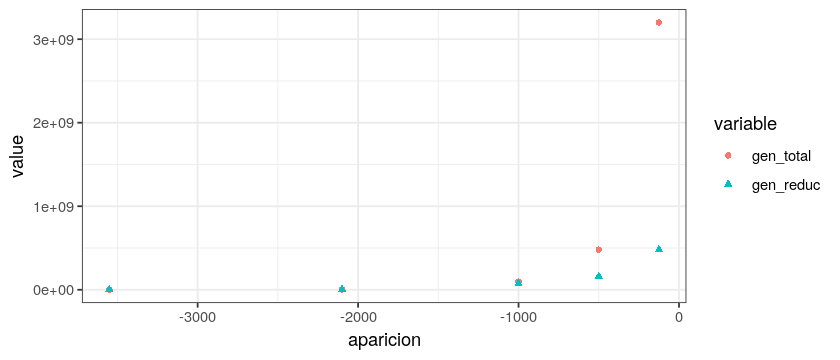

In [3]:
library(ggplot2)
library(reshape2)

options(repr.plot.height=3,repr.plot.width=7)
dfm<-melt(df,id=c("especie","aparicion"))
ggplot(data=dfm,aes(x=aparicion,y=value))+geom_point(aes(shape=variable,color=variable))+theme_bw()

especie,gen_total,gen_reduc,aparicion
<chr>,<dbl>,<dbl>,<dbl>
mamíferos,9.505150,8.681241,-125
peces,8.681241,8.204120,-500
gusanos,7.986772,7.857332,-1000
eucariotas,6.462398,6.462398,-2100
procariotas,5.698970,5.698970,-3550


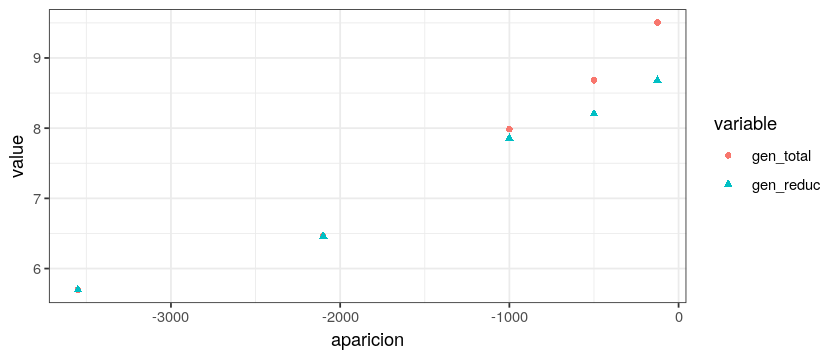

In [4]:
dflog<-df
dflog[,2:3]<- log10(dflog[,2:3])
#dflog[,4]<- -log10(-dflog[,4])
dflog

dfm<-melt(dflog,id=c("especie","aparicion"))

options(repr.plot.height=3,repr.plot.width=7)

ggplot(data=dfm,aes(x=aparicion,y=value))+geom_point(aes(shape=variable,color=variable))+theme_bw()